In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.features import DivIcon
import webbrowser
import os, json
import plotly.express as px
### 그래프 한글처리하기
plt.rc("font", family = "Malgun Gothic", size=10)

In [2]:
df_oil = pd.read_csv("../미니 프로젝트/oil.csv")
df_oil

,Unnamed: 0,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,영역,시
0,1,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-01,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
1,2,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-02,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
2,3,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-03,S-OIL,셀프,0.0,1354.0,1254.0,900.0,강원,강릉시
3,4,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-04,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
4,5,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2019-01-05,S-OIL,셀프,0.0,1344.0,1244.0,900.0,강원,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138911,337551,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-27,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138912,337552,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-28,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138913,337553,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-29,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시
18138914,337554,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2023-05-30,GS칼텍스,셀프,0.0,1568.0,1378.0,1200.0,충북,충주시


In [3]:
#df_oil['지역'][:10]

In [4]:
#df_oil['지역'][:10].apply(lambda x : x.split()[0])

In [5]:
df_oil.describe()

,Unnamed: 0,고급휘발유,휘발유,경유,실내등유
count,1.813892e+07,1.813892e+07,1.813892e+07,1.813892e+07,1.813892e+07
mean,1.713184e+05,1.797086e+02,1.558437e+03,1.447974e+03,6.821144e+02
std,9.912842e+04,5.527496e+02,2.232745e+02,2.703235e+02,5.707248e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.556100e+04,0.000000e+00,1.428000e+03,1.269000e+03,0.000000e+00
50%,1.711220e+05,0.000000e+00,1.545000e+03,1.389000e+03,8.750000e+02
75%,2.566830e+05,0.000000e+00,1.653000e+03,1.565000e+03,1.030000e+03
max,3.580820e+05,3.496000e+03,3.096000e+03,3.230000e+03,2.719000e+03


In [6]:
### 사용할 컬럼 별도 데이터프레임으로 추출하기
df_oil = df_oil[["영역", "기간", "고급휘발유", "휘발유", "경유", "실내등유"]].copy()
df_oil

,영역,기간,고급휘발유,휘발유,경유,실내등유
0,강원,2019-01-01,0.0,1354.0,1254.0,900.0
1,강원,2019-01-02,0.0,1354.0,1254.0,900.0
2,강원,2019-01-03,0.0,1354.0,1254.0,900.0
3,강원,2019-01-04,0.0,1344.0,1244.0,900.0
4,강원,2019-01-05,0.0,1344.0,1244.0,900.0
...,...,...,...,...,...,...
18138911,충북,2023-05-27,0.0,1568.0,1378.0,1200.0
18138912,충북,2023-05-28,0.0,1568.0,1378.0,1200.0
18138913,충북,2023-05-29,0.0,1568.0,1378.0,1200.0
18138914,충북,2023-05-30,0.0,1568.0,1378.0,1200.0


In [7]:
df_oil['영역'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [8]:
#len(df_oil['지역'].unique())

In [9]:
# 컬럼명 바꾸기
df_oil.rename(columns = {'영역':'지역'},inplace=True)
df_oil

,지역,기간,고급휘발유,휘발유,경유,실내등유
0,강원,2019-01-01,0.0,1354.0,1254.0,900.0
1,강원,2019-01-02,0.0,1354.0,1254.0,900.0
2,강원,2019-01-03,0.0,1354.0,1254.0,900.0
3,강원,2019-01-04,0.0,1344.0,1244.0,900.0
4,강원,2019-01-05,0.0,1344.0,1244.0,900.0
...,...,...,...,...,...,...
18138911,충북,2023-05-27,0.0,1568.0,1378.0,1200.0
18138912,충북,2023-05-28,0.0,1568.0,1378.0,1200.0
18138913,충북,2023-05-29,0.0,1568.0,1378.0,1200.0
18138914,충북,2023-05-30,0.0,1568.0,1378.0,1200.0


In [10]:
# df_oil = df_oil[df_oil.고급휘발유 != 0]
# df_oil

In [11]:
# 2019 ~ 2023년 17개 지역별 유가 비교 및 인사이트 도출

In [12]:
df_oil['기간'] = pd.to_datetime(df_oil['기간'])

In [13]:
import datetime as dt

In [14]:
## Year 컬럼 삭제
df_oil= df_oil.drop(['Year'], axis=1)
df_oil

KeyError: "['Year'] not found in axis"

In [17]:
## 연도별로 그룹화하기
df_oil['연도'] = df_oil['기간'].dt.year
df_oil.groupby('연도')['고급휘발유'].aggregate(['mean']).reset_index()
df_oil

,지역,기간,고급휘발유,휘발유,경유,실내등유,연도
0,강원,2019-01-01,0.0,1354.0,1254.0,900.0,2019
1,강원,2019-01-02,0.0,1354.0,1254.0,900.0,2019
2,강원,2019-01-03,0.0,1354.0,1254.0,900.0,2019
3,강원,2019-01-04,0.0,1344.0,1244.0,900.0,2019
4,강원,2019-01-05,0.0,1344.0,1244.0,900.0,2019
...,...,...,...,...,...,...,...
18138911,충북,2023-05-27,0.0,1568.0,1378.0,1200.0,2023
18138912,충북,2023-05-28,0.0,1568.0,1378.0,1200.0,2023
18138913,충북,2023-05-29,0.0,1568.0,1378.0,1200.0,2023
18138914,충북,2023-05-30,0.0,1568.0,1378.0,1200.0,2023


In [18]:
pivot_year= df_oil.pivot_table(values = "휘발유",
                               index = "기간",
                               columns = "지역",
                               aggfunc = "mean")
pivot_year

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주,충남,충북
기간,,,,,,,,,,,,,,,,,
2019-01-01,1387.188988,1381.655276,1334.355438,1348.411859,1368.148551,1331.224044,1358.907563,1329.534279,1493.439842,1407.484375,1351.568465,1355.861357,1366.579727,1347.799102,1386.291667,1369.959606,1364.627451
2019-01-02,1385.962687,1377.730294,1330.487179,1346.412330,1365.129964,1327.363388,1355.460251,1329.431604,1489.710059,1403.156250,1346.855372,1352.882006,1365.520501,1343.787879,1385.901042,1374.040394,1368.235294
2019-01-03,1381.633383,1374.122336,1327.900709,1347.324540,1361.176895,1323.500000,1344.375000,1324.474178,1485.027613,1400.796875,1343.082988,1348.867257,1363.941913,1335.426009,1386.067358,1372.297244,1366.911765
2019-01-04,1374.037258,1369.260443,1319.096546,1342.728583,1337.083333,1319.103825,1347.083682,1317.872941,1482.749012,1394.156250,1344.634855,1340.758112,1361.356492,1334.759820,1382.077720,1365.575221,1365.548252
2019-01-05,1368.232836,1367.389245,1316.900444,1338.640512,1339.927536,1316.027322,1344.631799,1313.632941,1477.875248,1386.406250,1341.842324,1341.943953,1359.871298,1335.415264,1381.404145,1361.383251,1360.152448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,1600.946457,1597.244191,1583.855352,1583.799670,1585.177419,1560.762918,1579.665094,1583.154472,1673.972665,1602.415385,1575.883929,1580.099042,1602.129717,1581.673544,1623.186528,1601.747174,1600.165698
2023-05-28,1600.179528,1596.876044,1581.426641,1584.512799,1584.733871,1559.629179,1578.683962,1583.233696,1673.797267,1601.818182,1574.959641,1579.503205,1601.295159,1579.088700,1623.290155,1601.251546,1602.244541
2023-05-29,1599.345426,1596.485463,1583.862536,1582.170107,1584.286290,1558.899696,1577.919811,1582.708447,1676.200456,1601.666667,1574.757848,1579.918831,1600.397633,1578.602673,1623.290155,1602.099897,1601.327007


In [19]:
df_total = df_oil.groupby(['연도', '지역'], as_index=False).mean()
df_total

,연도,지역,기간,고급휘발유,휘발유,경유,실내등유
0,2019,강원,2019-07-01 10:45:11.946870016,76.570840,1468.229679,1353.806918,699.121427
1,2019,경기,2019-07-01 23:35:48.224081408,175.321462,1476.572091,1344.453756,606.125268
2,2019,경남,2019-07-01 12:03:09.659102208,67.620695,1443.956285,1319.396756,669.712901
3,2019,경북,2019-07-02 01:56:15.339508736,33.687282,1449.628650,1324.159902,671.395854
4,2019,광주,2019-07-01 08:56:33.531632640,152.490781,1452.274646,1321.494536,462.288729
...,...,...,...,...,...,...,...
80,2023,전남,2023-03-16 23:11:35.110610176,71.383660,1591.904850,1579.901641,984.798546
81,2023,전북,2023-03-16 21:07:06.982586368,130.387430,1577.957697,1556.372719,918.748622
82,2023,제주,2023-03-16 23:20:03.948992256,79.470965,1651.531469,1586.165673,1183.906520
83,2023,충남,2023-03-16 21:52:27.859135232,106.480682,1594.357320,1576.125819,1014.312548


In [20]:
## 연도 추출하는 법
df_oil['기간'][:10].apply(lambda x: x.strftime('%Y'))

0    2019
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: 기간, dtype: object

In [21]:
# 고급휘발유 0값은 데이터는 평균 구하는 데 제외하기
df_oil2 = df_oil[df_oil["고급휘발유"] != 0]
df_oil2

,지역,기간,고급휘발유,휘발유,경유,실내등유,연도
217,강원,2019-01-01,1693.0,1438.0,1348.0,950.0,2019
218,강원,2019-01-02,1693.0,1438.0,1348.0,950.0,2019
219,강원,2019-01-03,1693.0,1438.0,1348.0,950.0,2019
220,강원,2019-01-04,1693.0,1438.0,1348.0,950.0,2019
221,강원,2019-01-05,1693.0,1438.0,1348.0,950.0,2019
...,...,...,...,...,...,...,...
18138139,충북,2023-05-27,1879.0,1579.0,1389.0,0.0,2023
18138140,충북,2023-05-28,1879.0,1579.0,1389.0,0.0,2023
18138141,충북,2023-05-29,1879.0,1579.0,1389.0,0.0,2023
18138142,충북,2023-05-30,1879.0,1579.0,1389.0,0.0,2023


In [22]:
# 제거 확인
df_oil2["고급휘발유"].isin([0])

217         False
218         False
219         False
220         False
221         False
            ...  
18138139    False
18138140    False
18138141    False
18138142    False
18138143    False
Name: 고급휘발유, Length: 1757834, dtype: bool

In [23]:
df_oil2["고급휘발유"].describe()

count    1.757834e+06
mean     1.854396e+03
std      2.173104e+02
min      1.197000e+03
25%      1.705000e+03
50%      1.825000e+03
75%      1.959000e+03
max      3.496000e+03
Name: 고급휘발유, dtype: float64

In [24]:
# 특정값 만족하는 행 삭제하는 법
DF = DF[DF.칼럼명 != '특정 값']

NameError: name 'DF' is not defined

In [25]:
# 실내등유 0원인 데이터 제거
df_oil3 = df_oil[df_oil["실내등유"] != 0]
df_oil3

,지역,기간,고급휘발유,휘발유,경유,실내등유,연도
0,강원,2019-01-01,0.0,1354.0,1254.0,900.0,2019
1,강원,2019-01-02,0.0,1354.0,1254.0,900.0,2019
2,강원,2019-01-03,0.0,1354.0,1254.0,900.0,2019
3,강원,2019-01-04,0.0,1344.0,1244.0,900.0,2019
4,강원,2019-01-05,0.0,1344.0,1244.0,900.0,2019
...,...,...,...,...,...,...,...
18138911,충북,2023-05-27,0.0,1568.0,1378.0,1200.0,2023
18138912,충북,2023-05-28,0.0,1568.0,1378.0,1200.0,2023
18138913,충북,2023-05-29,0.0,1568.0,1378.0,1200.0,2023
18138914,충북,2023-05-30,0.0,1568.0,1378.0,1200.0,2023


In [26]:
df_oil3["실내등유"].isin([0])

0           False
1           False
2           False
3           False
4           False
            ...  
18138911    False
18138912    False
18138913    False
18138914    False
18138915    False
Name: 실내등유, Length: 11405395, dtype: bool

In [27]:
df_oil3["실내등유"].describe()

count    1.140540e+07
mean     1.084821e+03
std      2.848935e+02
min      1.000000e+01
25%      9.000000e+02
50%      9.900000e+02
75%      1.300000e+03
max      2.719000e+03
Name: 실내등유, dtype: float64

In [28]:
# 고급 휘발유 평균
df_oil2 = df_oil2.groupby(['연도', '지역'], as_index=False).mean()
df_oil2[['지역', '고급휘발유']]

,지역,고급휘발유
0,강원,1766.872864
1,경기,1764.862271
2,경남,1751.627789
3,경북,1762.864207
4,광주,1670.906424
...,...,...
80,전남,1827.816597
81,전북,1827.314748
82,제주,1946.538203
83,충남,1880.571617


In [29]:
# 실내 등유 평균
df_oil3 = df_oil3.groupby(['연도', '지역'], as_index=False).mean()
df_oil3

,연도,지역,기간,고급휘발유,휘발유,경유,실내등유
0,2019,강원,2019-06-29 09:04:54.835885824,71.022983,1475.267828,1355.553175,927.295711
1,2019,경기,2019-06-27 13:10:49.831493888,148.607109,1477.052169,1344.330572,988.038652
2,2019,경남,2019-06-27 22:20:13.828339456,53.472002,1447.229306,1321.653863,955.123415
3,2019,경북,2019-06-28 20:50:32.850348544,26.792464,1452.577649,1326.540405,936.444527
4,2019,광주,2019-06-23 12:54:50.232008960,83.906103,1448.827557,1321.516411,1012.079836
...,...,...,...,...,...,...,...
80,2023,전남,2023-03-15 20:08:06.967387648,41.182307,1596.993004,1588.593904,1403.609044
81,2023,전북,2023-03-15 16:05:15.734265600,75.536774,1590.915331,1572.581828,1390.626785
82,2023,제주,2023-03-16 05:16:38.210588160,56.882946,1654.251182,1589.690994,1349.362024
83,2023,충남,2023-03-15 11:15:41.932328192,88.710188,1604.930635,1586.421421,1405.889650


In [30]:
#df_oil3 = df_oil3.drop(['고급휘발유', '휘발유', '경유'], axis=1)

In [31]:
df_oil3

,연도,지역,기간,고급휘발유,휘발유,경유,실내등유
0,2019,강원,2019-06-29 09:04:54.835885824,71.022983,1475.267828,1355.553175,927.295711
1,2019,경기,2019-06-27 13:10:49.831493888,148.607109,1477.052169,1344.330572,988.038652
2,2019,경남,2019-06-27 22:20:13.828339456,53.472002,1447.229306,1321.653863,955.123415
3,2019,경북,2019-06-28 20:50:32.850348544,26.792464,1452.577649,1326.540405,936.444527
4,2019,광주,2019-06-23 12:54:50.232008960,83.906103,1448.827557,1321.516411,1012.079836
...,...,...,...,...,...,...,...
80,2023,전남,2023-03-15 20:08:06.967387648,41.182307,1596.993004,1588.593904,1403.609044
81,2023,전북,2023-03-15 16:05:15.734265600,75.536774,1590.915331,1572.581828,1390.626785
82,2023,제주,2023-03-16 05:16:38.210588160,56.882946,1654.251182,1589.690994,1349.362024
83,2023,충남,2023-03-15 11:15:41.932328192,88.710188,1604.930635,1586.421421,1405.889650


In [32]:
# 고급휘발유 컬럼만 넣기
#df_oil2 = df_oil2.drop(['휘발유', '경유', '실내등유'], axis=1)

In [33]:
df_oil2

,연도,지역,기간,고급휘발유,휘발유,경유,실내등유
0,2019,강원,2019-07-13 00:45:48.195974144,1766.872864,1491.705184,1370.181067,654.939613
1,2019,경기,2019-07-05 22:16:03.266072320,1764.862271,1505.952616,1371.267703,544.541753
2,2019,경남,2019-07-02 05:04:46.061065984,1751.627789,1440.376699,1313.697895,535.821986
3,2019,경북,2019-07-05 13:42:40.046109440,1762.864207,1459.531758,1329.074928,547.693718
4,2019,광주,2019-07-06 01:04:55.895808256,1670.906424,1460.100471,1327.767648,252.551275
...,...,...,...,...,...,...,...
80,2023,전남,2023-03-17 00:46:28.214071040,1827.816597,1593.261375,1562.844057,595.395270
81,2023,전북,2023-03-17 22:32:25.683453184,1827.314748,1576.438399,1525.101057,548.284622
82,2023,제주,2023-03-16 21:28:51.989924608,1946.538203,1645.730479,1577.039463,839.739715
83,2023,충남,2023-03-17 08:09:39.935275008,1880.571617,1546.694714,1572.073595,853.308163


In [34]:
해석) 지역별로 가격 변동이 크게 상이하지 않으나 2022년 모든 지역에서 동시다발적으로 고급휘발유가 폭등하여 최고점을 찍음

SyntaxError: unmatched ')' (2362079535.py, line 1)

In [35]:
해석) 2022년에 피크가를 찍고 2023년 다시 가격 안정화됨,
가격변동이 오르락 내리락하며 상승세도 하락세도 아님

SyntaxError: unmatched ')' (1373754479.py, line 1)

In [36]:
# 실내등유 그래프 만들기
pivot_oil3 = df_oil3.pivot_table(values = "실내등유", index = "지역", columns = "연도")
pivot_oil3

연도,2019,2020,2021,2022,2023
지역,,,,,
강원,927.295711,792.792386,909.135785,1471.876899,1386.125746
경기,988.038652,906.131421,981.081600,1489.763169,1481.759568
경남,955.123415,849.515032,946.589263,1474.842847,1436.151500
경북,936.444527,817.006255,920.251959,1460.293252,1400.064379
광주,1012.079836,954.409450,1006.131391,1463.288567,1531.249694
대구,986.737071,914.369580,980.416742,1474.560847,1491.044464
대전,977.815749,912.446770,982.132277,1489.415833,1486.497788
부산,1010.383078,932.836277,1010.148342,1503.477601,1528.594111
서울,1161.475138,1093.677552,1148.408270,1583.440233,1626.598916


In [37]:
df_oil3['지역'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [38]:
해석) 서울이 지역중 항상 가장 높은 평균가를 기록하는 양상을 보이며 22년 이후로 가격이 꽤나 상승하였음

SyntaxError: unmatched ')' (507529550.py, line 1)

In [39]:
pivot_oil3.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='지역')

In [40]:
df_total['휘발유']

0     1468.229679
1     1476.572091
2     1443.956285
3     1449.628650
4     1452.274646
         ...     
80    1591.904850
81    1577.957697
82    1651.531469
83    1594.357320
84    1596.505149
Name: 휘발유, Length: 85, dtype: float64

In [41]:
# 유가별 연간 평균가데이터 모두 합치기
df_final= pd.concat([df_total[['연도','지역','휘발유','경유']], df_oil2['고급휘발유'], df_oil3['실내등유']], axis = 1).reset_index(drop=True)
df_final

,연도,지역,휘발유,경유,고급휘발유,실내등유
0,2019,강원,1468.229679,1353.806918,1766.872864,927.295711
1,2019,경기,1476.572091,1344.453756,1764.862271,988.038652
2,2019,경남,1443.956285,1319.396756,1751.627789,955.123415
3,2019,경북,1449.628650,1324.159902,1762.864207,936.444527
4,2019,광주,1452.274646,1321.494536,1670.906424,1012.079836
...,...,...,...,...,...,...
80,2023,전남,1591.904850,1579.901641,1827.816597,1403.609044
81,2023,전북,1577.957697,1556.372719,1827.314748,1390.626785
82,2023,제주,1651.531469,1586.165673,1946.538203,1349.362024
83,2023,충남,1594.357320,1576.125819,1880.571617,1405.889650


In [42]:
df_final.describe()

,연도,휘발유,경유,고급휘발유,실내등유
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2021.000000,1566.931109,1466.834459,1833.277713,1151.894648
std,1.422607,147.190049,226.091451,142.277882,270.066106
min,2019.000000,1348.389385,1157.487680,1573.188248,768.826629
25%,2020.000000,1451.336848,1324.159902,1748.329249,930.494205
50%,2021.000000,1575.308625,1392.415083,1806.369940,1006.131391
75%,2022.000000,1602.417556,1576.125819,1923.591635,1457.384271
max,2023.000000,1877.600838,1917.343814,2141.216381,1626.598916


In [43]:
df_final.columns

Index(['연도', '지역', '휘발유', '경유', '고급휘발유', '실내등유'], dtype='object')

In [44]:
분석) - 전체 중 실내등유와 고급휘발유가 유가 중 각각 최저가와 최고가를 기록하였음
- 실내등유의 변동폭이 다른 석유들보다 컸음.
- 평균적으로 서울과 제주의 유가가 다른 지역보다 비싼 편임

SyntaxError: unmatched ')' (3387660575.py, line 1)

In [137]:
df_final['휘발유'].describe()

count      85.000000
mean     1566.931109
std       147.190049
min      1348.389385
25%      1451.336848
50%      1575.308625
75%      1602.417556
max      1877.600838
Name: 휘발유, dtype: float64

<Figure size 1500x1500 with 0 Axes>

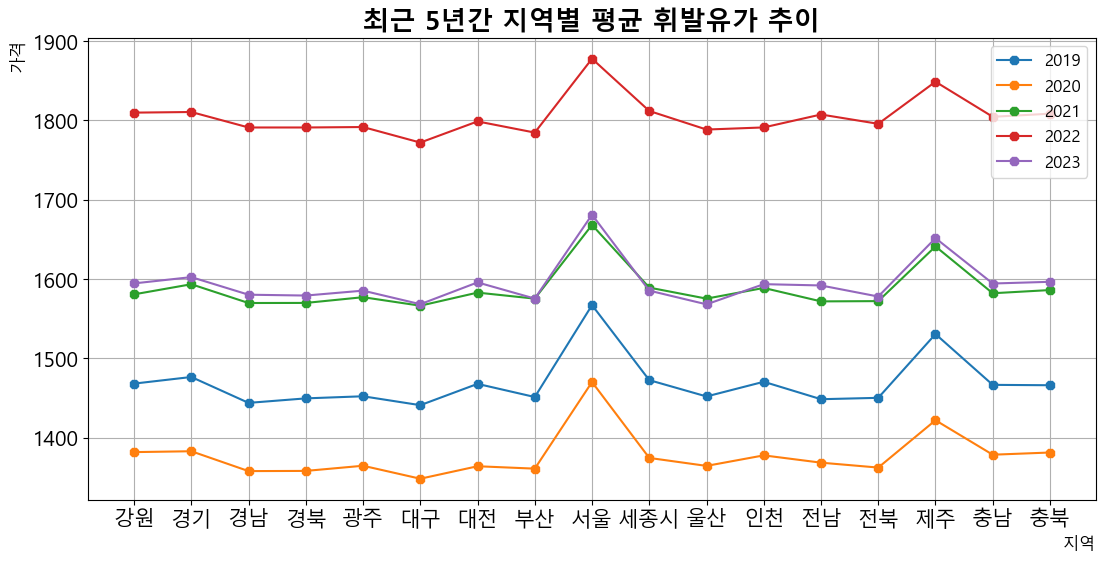

In [144]:
## 연간 휘발유 가격변동 그래프 만들기
#plt.subplot(2, 1, 2)
pivot_gasoline = df_final.pivot_table(index='지역', columns='연도', values='휘발유')
plt.figure(figsize=(15,15))
pivot_gasoline.plot(marker="8")

# x축 지역값 누락 방지
e_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북']
plt.xticks(range(0, len(e_list)), e_list)
plt.title('최근 5년간 지역별 평균 휘발유가 추이', fontdict={'weight': 'bold', 'size': 19})
plt.xlabel('지역', loc='right')
plt.ylabel('가격', loc='top')

#폰트 조절
plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=12)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=13) # figure title 폰트 크기

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<Figure size 1500x1500 with 0 Axes>

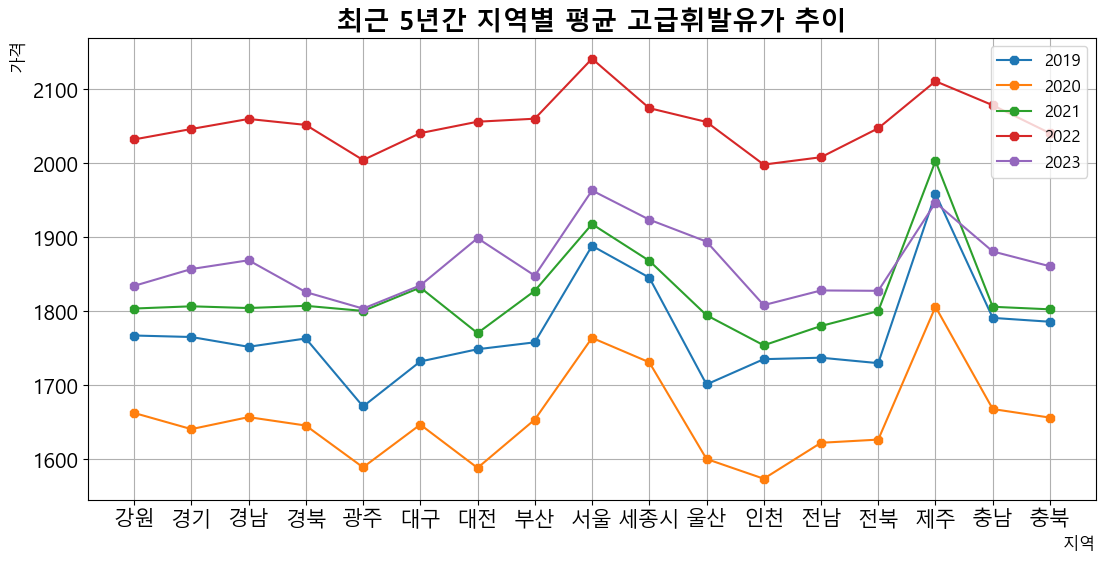

In [148]:
## 연간 고급휘발유 가격변동 그래프 만들기
pivot_high = df_final.pivot_table(index='지역', columns='연도', values='고급휘발유')

plt.figure(figsize=(15,15))
pivot_high.plot(marker="8")

# x축 지역값 누락 방지
d_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북']
plt.xticks(range(0, len(d_list)), d_list)

plt.title('최근 5년간 지역별 평균 고급휘발유가 추이', fontdict={'weight': 'bold', 'size': 19})
plt.xlabel('지역', loc='right')
plt.ylabel('가격', loc='top')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<Figure size 1500x1500 with 0 Axes>

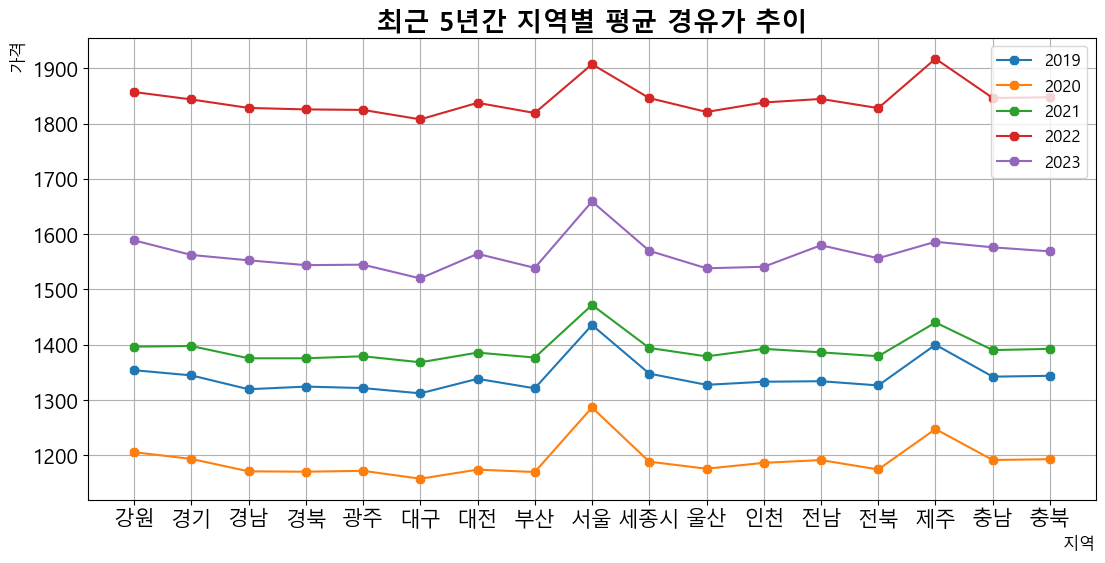

In [155]:
## 연간 경유 가격변동 그래프 만들기
pivot_diesel = df_final.pivot_table(index='지역', columns='연도', values='경유')

# c : 색상
# lw : 선의 굵기
# ls : 선스타일
# marker : 지점 모양
# ms : 마커 사이즈
# mec : 마커 테두리 색상
# mew : 마커 테두리 두께
# mfc :마커 내부 채우기
# plt.plot(x, y, 
#          c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.figure(figsize=(15,15))
pivot_diesel.plot(marker="8")

# x축 지역값 누락 방지
d_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북']
plt.xticks(range(0, len(d_list)), d_list)

plt.title('최근 5년간 지역별 평균 경유가 추이', fontdict={'weight': 'bold', 'size': 19})
plt.xlabel('지역', loc='right')
plt.ylabel('가격', loc='top')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<Figure size 1500x1500 with 0 Axes>

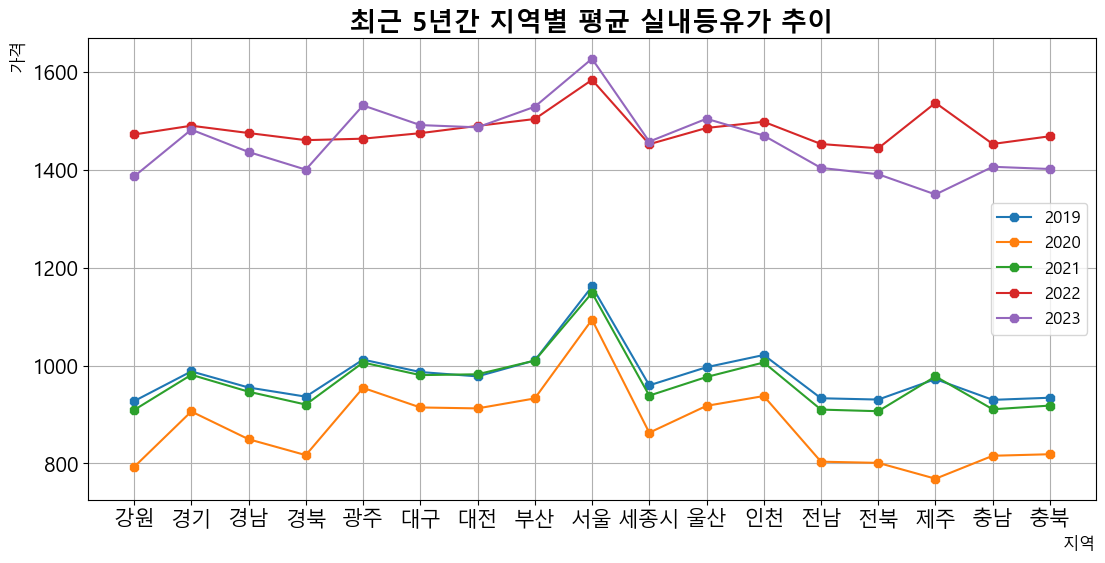

In [156]:
## 연간 실내등유 가격변동 그래프 만들기
pivot_kerosene = df_final.pivot_table(index='지역', columns='연도', values='실내등유')
plt.figure(figsize=(15,15))
pivot_kerosene.plot(marker="8")

# x축 지역값 누락 방지
d_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북']
plt.xticks(range(0, len(d_list)), d_list)

plt.title('최근 5년간 지역별 평균 실내등유가 추이', fontdict={'weight': 'bold', 'size': 19})
plt.xlabel('지역', loc='right')
plt.ylabel('가격', loc='top')

plt.grid(True)
plt.legend(loc='best')
plt.show()

In [51]:
df_gas = df_final.iloc[:,[0,1,2]]
df_gas

,연도,지역,휘발유
0,2019,강원,1468.229679
1,2019,경기,1476.572091
2,2019,경남,1443.956285
3,2019,경북,1449.628650
4,2019,광주,1452.274646
...,...,...,...
80,2023,전남,1591.904850
81,2023,전북,1577.957697
82,2023,제주,1651.531469
83,2023,충남,1594.357320


In [52]:
df_gas = df_gas.loc[(df_gas['연도'] == 2023)]

In [53]:
df_gas.to_csv("../미니 프로젝트/gas.csv", encoding = 'cp949')

In [54]:
## 2023년 휘발유가 지도로 나타내보기

def main():
    csvFile = "../미니 프로젝트/gas.csv"
    SiDodf = pd.read_csv(csvFile, encoding = 'euc-kr')

    print(SiDodf)

SiDo_geo = 'Si_Do_map_utf8.json'
# Initialize the map at Seoul
m = folium.Map(location=[36.45,127.42],\
               tiles="OpenStreetMap", zoom_start=8)

# Json map polygon 경계좌표값으로 구역별 색칠하기
folium.Choropleth(geo_data = SiDo_geo,
                  name='2023년 전국 휘발유 평균가',
                  data=SiDodf,
                  columns=['지역', '휘발유'],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='PuRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legent_name='전국 휘발유가').add_to(m)

# 색칠한 layer 켜고 끄기 버튼 추가
folium.LayerControl().add_to(m)

m.save('map.html')
webbrowser.open('map.html')

NameError: name 'SiDodf' is not defined

In [55]:
csvFile = "../미니 프로젝트/gas.csv"
SiDodf = pd.read_csv(csvFile, encoding = 'euc-kr')
print(SiDodf)

    Unnamed: 0    연도   지역          휘발유
0           68  2023   강원  1594.494959
1           69  2023   경기  1602.417556
2           70  2023   경남  1580.257904
3           71  2023   경북  1579.188953
4           72  2023   광주  1585.364832
5           73  2023   대구  1568.289675
6           74  2023   대전  1595.756170
7           75  2023   부산  1575.374306
8           76  2023   서울  1681.060178
9           77  2023  세종시  1585.395594
10          78  2023   울산  1568.105232
11          79  2023   인천  1593.550607
12          80  2023   전남  1591.904850
13          81  2023   전북  1577.957697
14          82  2023   제주  1651.531469
15          83  2023   충남  1594.357320
16          84  2023   충북  1596.505149


In [56]:
m = folium.Map(location=[35.8, 128.071503], zoom_start=7)
m

In [57]:
state_geo = "../미니 프로젝트/TL_SCCO_CTPRVN.json"
state_geo

# 시도기준 경계 JSON 파일을 들고 온다.
with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

In [58]:
sido_map['features'][0]['properties']

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원'}

In [59]:
df_gas["지역"].values

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [60]:
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=df_gas,
    # csv 파일에서 사용할 컬럼 값
    columns=['지역', '휘발유'], 
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color='YlOrBr',
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name='지역별 평균 휘발유가(원)',
    # 하이라이트 설정
    highlight=True, 
).add_to(m)

m

In [61]:
# 지도 위에 text 넣기 
# 위도경도 매핑
locs = {
    '경기': (37.95, 126.95),
    '서울': (37.566535, 126.9779692),
    '부산':(35.198362, 129.053922),
    '경북':  (36.63, 128.46),
    '경남': (35.5, 128),
    '인천':  (37.4562557, 126.7052062),
    '대구': (35.96, 128.32),
    '충남': (36.69, 126),
    '전남':  (34.8679, 126.991),
    '전북':  (35.86, 126.85),
    '대전':   (36.321655, 127.378953),
    '강원': (37.88, 128),
    '광주': (35.28, 126.49),
    '울산': (35.5383773, 129.3113596),
    '충북': (37.19, 127.5),
    '세종시': (36.7, 127.07),
    '제주':   (33.4996213, 126.5311884),
}

locs

{'경기': (37.95, 126.95),
 '서울': (37.566535, 126.9779692),
 '부산': (35.198362, 129.053922),
 '경북': (36.63, 128.46),
 '경남': (35.5, 128),
 '인천': (37.4562557, 126.7052062),
 '대구': (35.96, 128.32),
 '충남': (36.69, 126),
 '전남': (34.8679, 126.991),
 '전북': (35.86, 126.85),
 '대전': (36.321655, 127.378953),
 '강원': (37.88, 128),
 '광주': (35.28, 126.49),
 '울산': (35.5383773, 129.3113596),
 '충북': (37.19, 127.5),
 '세종시': (36.7, 127.07),
 '제주': (33.4996213, 126.5311884)}

In [62]:
sido_ = df_gas[['지역','휘발유']]

In [63]:
folium.LayerControl().add_to(m)

for key, value in locs.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.5rem;\
                        color: black;\
                        background-color:rgba(300, 255, 124, 0.5);\
                        width:30px;\
                        text-align:right;\
                        margin:0px;\
                    "><b>'
            + key
            + '</b></div>',
        )).add_to(m)

# 타이틀 추가
folium.map.Marker(
    [34.2, 126.8],
    icon=DivIcon(
        icon_size=(500, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 3rem; background-color:black;color:white;text-align:center;">'
        + '<b>2023년 지역별 평균 휘발유가<b></div>',
    )
).add_to(m)

m
m.save('gasoline.html')
webbrowser.open('gasoline.html')

True

In [64]:
 await page.goto('../미니 프로젝트/'.format(path=%EB%AF%B8%EB%8B%88%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/gasoline.html))

SyntaxError: invalid syntax (126821600.py, line 1)

In [65]:
#위도경도 데이터 자료 출처: https://kr.toponavi.com/25081

In [66]:
# 경유
diesel = df_final.iloc[:,[0,1,3]]
# 고급휘발유
high = df_final.iloc[:,[0,1,4]]
# 실내등유
kerosene= df_final.iloc[:,[0,1,5]]
diesel, high, kerosene

(      연도  지역           경유
 0   2019  강원  1353.806918
 1   2019  경기  1344.453756
 2   2019  경남  1319.396756
 3   2019  경북  1324.159902
 4   2019  광주  1321.494536
 ..   ...  ..          ...
 80  2023  전남  1579.901641
 81  2023  전북  1556.372719
 82  2023  제주  1586.165673
 83  2023  충남  1576.125819
 84  2023  충북  1568.827459
 
 [85 rows x 3 columns],
       연도  지역        고급휘발유
 0   2019  강원  1766.872864
 1   2019  경기  1764.862271
 2   2019  경남  1751.627789
 3   2019  경북  1762.864207
 4   2019  광주  1670.906424
 ..   ...  ..          ...
 80  2023  전남  1827.816597
 81  2023  전북  1827.314748
 82  2023  제주  1946.538203
 83  2023  충남  1880.571617
 84  2023  충북  1860.502147
 
 [85 rows x 3 columns],
       연도  지역         실내등유
 0   2019  강원   927.295711
 1   2019  경기   988.038652
 2   2019  경남   955.123415
 3   2019  경북   936.444527
 4   2019  광주  1012.079836
 ..   ...  ..          ...
 80  2023  전남  1403.609044
 81  2023  전북  1390.626785
 82  2023  제주  1349.362024
 83  2023  충남  1405.889650
 84

In [67]:
diesel = diesel.loc[(diesel['연도'] == 2023)]
diesel.to_csv("../미니 프로젝트/diesel.csv", encoding = 'cp949')
high = high.loc[(high['연도'] == 2023)]
high.to_csv("../미니 프로젝트/high.csv", encoding = 'cp949')
kerosene = kerosene.loc[(kerosene['연도'] == 2023)]
kerosene.to_csv("../미니 프로젝트/kerosene.csv", encoding = 'cp949')

In [68]:
diesel.describe()

,연도,경유
count,17.0,17.000000
mean,2023.0,1564.174371
std,0.0,30.959713
min,2023.0,1519.899990
25%,2023.0,1543.901910
50%,2023.0,1562.361070
75%,2023.0,1576.125819
max,2023.0,1659.067575


In [69]:
high.describe()

,연도,고급휘발유
count,17.0,17.000000
mean,2023.0,1864.733867
std,0.0,47.163390
min,2023.0,1803.267298
25%,2023.0,1827.816597
50%,2023.0,1856.761409
75%,2023.0,1893.902130
max,2023.0,1963.035519


In [70]:
kerosene.describe()

,연도,실내등유
count,17.0,17.000000
mean,2023.0,1455.881070
std,0.0,69.659907
min,2023.0,1349.362024
25%,2023.0,1401.380205
50%,2023.0,1457.384271
75%,2023.0,1491.044464
max,2023.0,1626.598916


In [71]:
# 경유(diesel) 지도화
d = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=diesel,
    # csv 파일에서 사용할 컬럼 값
    columns=['지역', '경유'], 
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color='BuPu',
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name='지역별 평균 경유가(원)',
    # 하이라이트 설정
    highlight=True, 
).add_to(d)

folium.LayerControl().add_to(d)

for key, value in locs.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.5rem;\
                        color: black;\
                        background-color:rgba(300, 255, 124, 0.5);\
                        width:30px;\
                        text-align:right;\
                        margin:0px;\
                    "><b>'
            + key
            + '</b></div>',
        )).add_to(d)

# 타이틀 추가
folium.map.Marker(
    [34.2, 126.8],
    icon=DivIcon(
        icon_size=(500, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 3rem; background-color:black;color:white;text-align:center;">'
        + '<b>2023년 지역별 평균 경유가<b></div>',
    )
).add_to(d)

d
d.save('diesel.html')
webbrowser.open('diesel.html')

True

In [146]:
d

In [143]:
# 고급휘발유(high) 지도화
h = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=high,
    # csv 파일에서 사용할 컬럼 값
    columns=['지역', '고급휘발유'], 
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color='Greens',
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name='지역별 평균 고급휘발유가(원)',
    # 하이라이트 설정
    highlight=True, 
).add_to(h)

folium.LayerControl().add_to(h)

for key, value in locs.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.5rem;\
                        color: black;\
                        background-color:rgba(300, 255, 124, 0.5);\
                        width:30px;\
                        text-align:right;\
                        margin:0px;\
                    "><b>'
            + key
            + '</b></div>',
        )).add_to(h)

# 타이틀 추가
folium.map.Marker(
    [34.2, 126.8],
    icon=DivIcon(
        icon_size=(500, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 3rem; background-color:black;color:white;text-align:center;">'
        + '<b>2023년 지역별 평균 고급휘발유가<b></div>',
    )
).add_to(h)

h
h.save('high.html')
webbrowser.open('high.html')

True

In [144]:
# 실내등유(kerosene) 지도화
k = folium.Map(location=[35.8, 128.071503], zoom_start=7,)

ch = folium.Choropleth(
    # geo json 파일로 sido_map 을 사용
    geo_data=sido_map,
    # choropleth 옵션을 쓸 것임
    name='choropleth',
    # data로는 population.csv 파일을 사용 (df로 불러옴)
    data=kerosene,
    # csv 파일에서 사용할 컬럼 값
    columns=['지역', '실내등유'], 
    # 시도명 - CTP_KOR_NM 매핑
    key_on='feature.properties.CTP_KOR_NM',  
    # geo json 색깔 설정
    fill_color='Greys',
    # 지도 투명하게  
    fill_opacity=0.7,
    # 경계선 투명하게
    line_opacity=1,  
    # 경계선 굵기
    line_weight=1.5,
    # 경계선 색
    line_color='#000',
    # 범례 이름
    legend_name='지역별 평균 실내등유가(원)',
    # 하이라이트 설정
    highlight=True, 
).add_to(k)

folium.LayerControl().add_to(k)

for key, value in locs.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.4rem;\
                        color: navy;\
                        background-color:transparent;\
                        width:30px;\
                        text-align:right;\
                        margin:0px;\
                    "><b>'
            + key
            + '</b></div>',
        )).add_to(k)

# 타이틀 추가
folium.map.Marker(
    [34.2, 126.8],
    icon=DivIcon(
        icon_size=(500, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 3rem; background-color:black;color:white;text-align:center;">'
        + '<b>2023년 지역별 평균 실내등유가<b></div>',
    )
).add_to(k)

k
k.save('kerosene.html')
webbrowser.open('kerosene.html')

True

In [145]:
#실제 기름색깔
경유:파란색 고급휘발유:초록색 등유:무색

실제 유종색으로 컬러맵화 해보았음
지역별 연간 고급휘발유가 추이: 지역별로 가격 변동이 크게 상이하지 않으나 2022년 모든 지역에서 동시다발적으로 폭등하여 최고점을 찍음/ 2022년에 피크가를 찍고 2023년 다시 가격 안정화됨,
가격변동이 오르락 내리락하며 상승세도 하락세도 아님

연간 등유가 추이: 서울이 지역중 항상 가장 높은 평균가를 기록하는 양상을 보이며 22년 이후로 가격이 꽤나 상승하였음

결론 : 서울의 유가는 전국구중 항상 가장 높고 다음으로는 제주가 높은 지역에 속한다.
유가가 상승하면 모든 지역에서 대체로 같이 상승 or 하락하며 차이는 100원대 수준으로 크지 않았다.

- 고급휘발유: 서울과 제주가 두 지역이 가장 비쌌음
- 휘발유: 최고-최저가 차이는 매년 100원 정도로, 모든 지역이 유사한 가격수준을 보여줬다
- 경유: 역시나 서울이 최고점을 기록함, 반면 제주의 경유가는 평이한 수준
- 실내등유: 모든 유가중 가장 싼편이며 지역별 가격차가 2023년 기준 약 277원으로 지역별로 유가차이가 가장 크다고 할 수 있다.

유종 4개 모두 통틀어 전북 및 부울경 지역은 유가가 대체로 저렴한 편이었다.
특히 전북의 유가가 대체로 매우 싸다.

SyntaxError: invalid syntax (2086820228.py, line 2)